## Step 1: Create tiny dataset
a 2D dataset with 8 datapoints

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
X = np.array(
    [
        [1, 2],
        [1.5, 1.8],
        [5, 8],
        [8, 8],
        [1, 0.6],
        [9, 11],
        [8, 2],
        [10, 2]
    ]
)

print(X.shape, "8 rows, 2 cols")

(8, 2) 8 rows, 2 cols


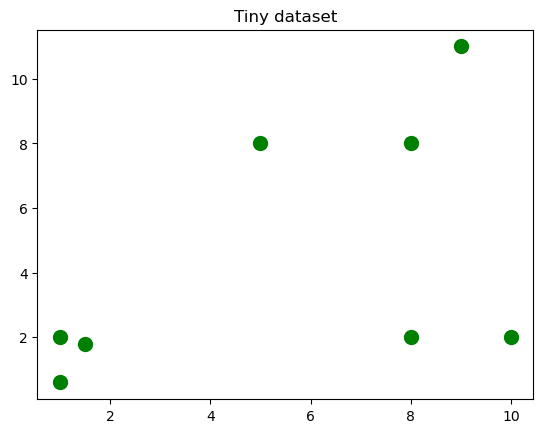

In [87]:
# visualize datapoints
plt.scatter(X[:, 0], X[:, 1], s=100, c='green')
plt.title("Tiny dataset")
plt.show()

# Step 2 Initialize cluster centroids :: k-means ++
1. Pick the first centroid randomly from the data
2. for every point compute D(x)**2 (i.e the squared euclidean distance) to its nearest chosen centroid
3. Pick the next centroid with probability proportional to D(x)**2  (farther undeserved regions are more likely)
4. Repeat step 2-3 until we've k centroids
5. Run standard k-means from here

In [88]:
# choose k
k = 3

#### function to calculate distance of points from centroids

In [94]:


from scipy.spatial.distance import cdist

def calculate_euclidean_dist(local_datapoints, local_centroids):
    # shape : (n_points, n_centroids)
    distances = cdist(local_datapoints, local_centroids) # eucl. dist by default
    return distances

In [95]:
def kmeans_plus_plus(datapoints, k, random_state=42):
    """
    k : number of clusters
    random_state : seed to control randomness for reproducibility.
    """

    # random number generator (for reproducibility of result)
    rng = np.random.RandomState(random_state)

    # no. of datapoints (== no. of rows)
    n_samples = datapoints.shape[0]

    # step-01: Pick the first centroid randomly from the data
    first_idx = rng.randint(n_samples)  # returns a random integer in range [0, no. of samples - 1]
    centroids = [ datapoints[first_idx] ]  # list of centroids, 3 here bcoz k = 3
    print(f"Step 1 : first centroid : {datapoints[first_idx]}")

    # Step-02: Compute squared distances of all other points from the 1st centroid
    # Step-03: Pick the next centroid with prob ∝ D(x)^2
    # Step-04: Repeat until we've k centroids
    for c_index in range(1, k):
        print(f"\nStep {c_index + 1}: ")
        
        sq_distances = (calculate_euclidean_dist(datapoints, (centroids)))**2
        min_sq_distances = np.min(sq_distances, axis = 1)
        print("Min Sq distances : ", min_sq_distances)
    
        probs = min_sq_distances / min_sq_distances.sum()
        probs = np.hstack(probs)
        print(f"Probabilities = {np.round(probs, 3)} ")

    
        # choose next centroid based on probs
        next_idx = rng.choice(n_samples, p=probs)  # picks an idex from [0, n_samples-1] weighted by probabilities
        print(next_idx)
        centroids.append(datapoints[next_idx])
        print(f"Choosen center = {datapoints[next_idx] } ")

    return np.array(centroids)
    

In [96]:
centroids = kmeans_plus_plus(X, 3)
print(centroids)

Step 1 : first centroid : [8. 2.]

Step 2: 
Min Sq distances :  [49.   42.29 45.   36.   50.96 82.    0.    4.  ]
Probabilities = [0.158 0.137 0.146 0.116 0.165 0.265 0.    0.013] 
5
Choosen center = [ 9. 11.] 

Step 3: 
Min Sq distances :  [49.   42.29 25.   10.   50.96  0.    0.    4.  ]
Probabilities = [0.27  0.233 0.138 0.055 0.281 0.    0.    0.022] 
0
Choosen center = [1. 2.] 
[[ 8.  2.]
 [ 9. 11.]
 [ 1.  2.]]


In [97]:
# visualize centroids

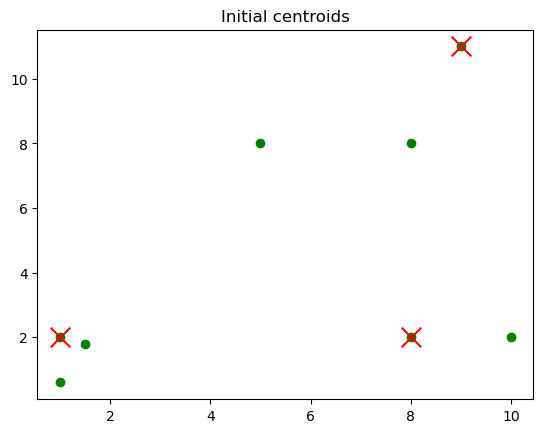

In [98]:
plt.scatter(X[:, 0], X[:, 1], c='green')  # datapoints
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200)  # centroids
plt.title("Initial centroids")
plt.show()

## Step : Assigning cluster to datapoints
datapoints will be assigned to the cluster with the nearer centroid

In [99]:
def assign_cluster(distances):
    # return 1 D array where each element is the index of the nearest centroid for the datapoint
    labels = np.argmin(distances, axis = 1)
    return labels

In [117]:
def visualize_cluster(local_centroids, labels, iteration):
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label = f"Cluster-{i}")

    plt.scatter(local_centroids[:, 0], local_centroids[:, 1], marker='x', c='red', s=200)
    plt.legend()
    plt.title(f"Iteration -{iteration}: Assignment of Cluster")
    plt.show()

## Step 6: Update centroids
now take the mean of the points in each cluster to get new centroids

In [118]:
def update_centroids(labels):
    new_centroids = []
    
    for i in range(k):
        # print(f"Cluster - {i}")
        arr = X[labels == i]
        # print(arr)
    
        cluster_mean = arr.mean(axis = 0)
        # print(f"Mean = {cluster_mean}")
    
        new_centroids.append(cluster_mean)
        # print()

    new_centroids = np.array(new_centroids)
    return new_centroids

## Step 7 : Calculate WCSS (Within Cluster Sum of Squares)

In [119]:
def calculate_wcss(distances, centroids):
    wcss = 0
    for i in range(distances.shape[1]):
        wcss += np.sum(distances[:, i]**2)

    return wcss


<h1><center>Final Function</center></h1>

In [120]:
def kmeans_loop(total_iterations, centroids):

    wcss_values = []

    for iteration in range(total_iterations):
        # print the present centroids
        print(f"Iteration - {iteration}\n")
        print("Centroids \n", centroids)
        
        # Calculate the distance of points from centroids
        distances = calculate_euclidean_dist(X, centroids)
    
        # assign clusters to datapoints
        labels = assign_cluster(distances)
    
        # calculate wcss
        wcss = calculate_wcss(distances, centroids)
        print("WCSS = ", wcss)
        wcss_values.append(wcss)
        
        # visualize the cluster
        visualize_cluster(centroids,labels,  iteration)

    
        # update the centroids
        centroids = update_centroids(labels)

    # elbow point graph
    plt.plot(range(total_iterations), wcss_values, c='red', marker='o')
    plt.title("Elbow point")
    plt.xlabel("Iteration -->")
    plt.ylabel("WCSS -->")
    plt.grid(linestyle='--', alpha = 0.7)
    plt.show()


    # elbow point : change in wcss vs iterations
    change_in_wcss= []
    prev = wcss_values[0]
    print("Prev = ", prev)
    for i in range(len(wcss_values)):
        change = abs(wcss_values[i] - prev)
        print("Change = ", change)
        change_in_wcss.append(change)
        prev = wcss_values[i]

    print(wcss_values)
    print(change_in_wcss)
    
    plt.plot(range(total_iterations), change_in_wcss, c='blue', marker='o')
    plt.title("Elbow point (Change in wcss vs iter)")
    plt.xlabel("Iteration")
    plt.ylabel("Change in WCSS")
    plt.grid(linestyle='--', alpha = 0.7)
    plt.show()

Iteration - 0

Centroids 
 [[ 8.  2.]
 [ 9. 11.]
 [ 1.  2.]]
WCSS =  1380.5500000000002


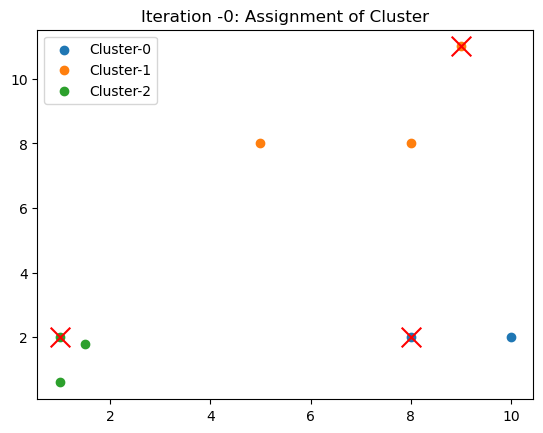

Iteration - 1

Centroids 
 [[9.         2.        ]
 [7.33333333 9.        ]
 [1.16666667 1.46666667]]
WCSS =  1189.73


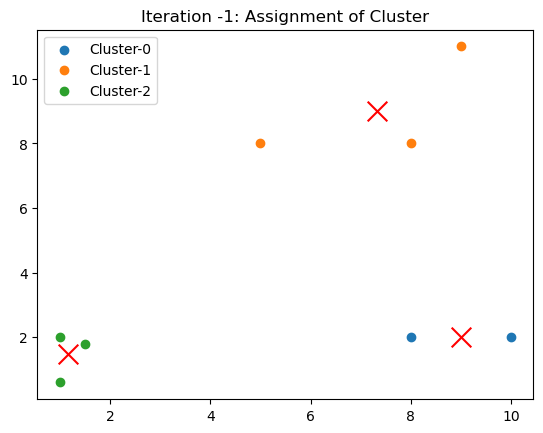

Iteration - 2

Centroids 
 [[9.         2.        ]
 [7.33333333 9.        ]
 [1.16666667 1.46666667]]
WCSS =  1189.73


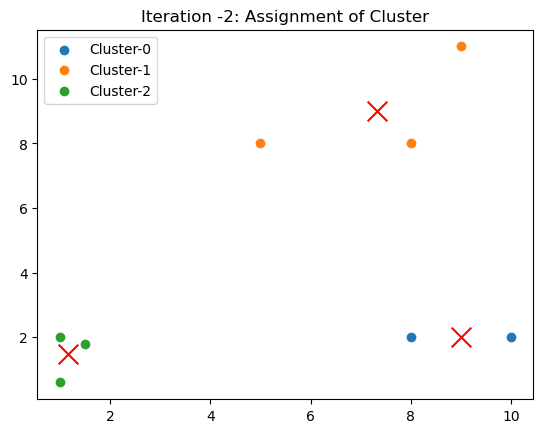

Iteration - 3

Centroids 
 [[9.         2.        ]
 [7.33333333 9.        ]
 [1.16666667 1.46666667]]
WCSS =  1189.73


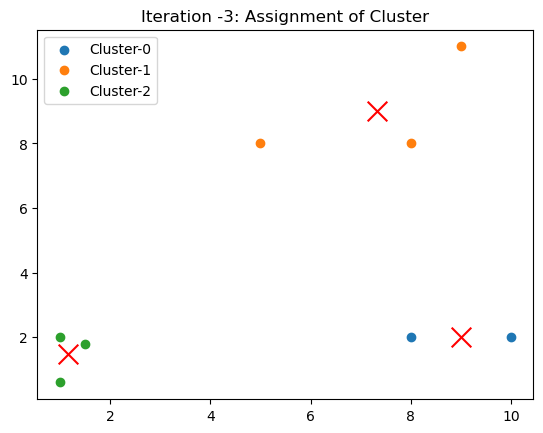

Iteration - 4

Centroids 
 [[9.         2.        ]
 [7.33333333 9.        ]
 [1.16666667 1.46666667]]
WCSS =  1189.73


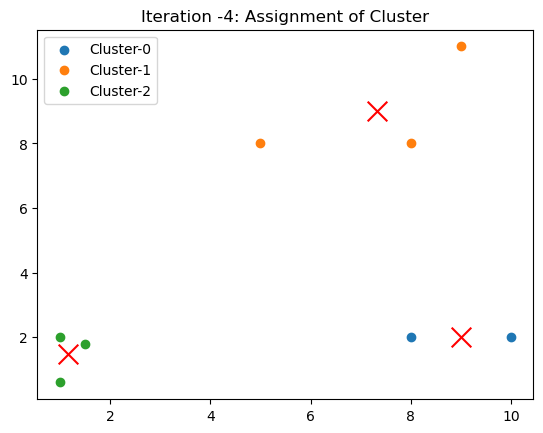

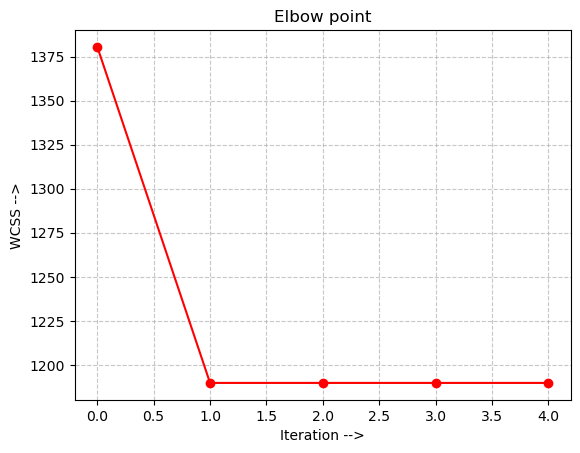

Prev =  1380.5500000000002
Change =  0.0
Change =  190.82000000000016
Change =  0.0
Change =  0.0
Change =  0.0
[1380.5500000000002, 1189.73, 1189.73, 1189.73, 1189.73]
[0.0, 190.82000000000016, 0.0, 0.0, 0.0]


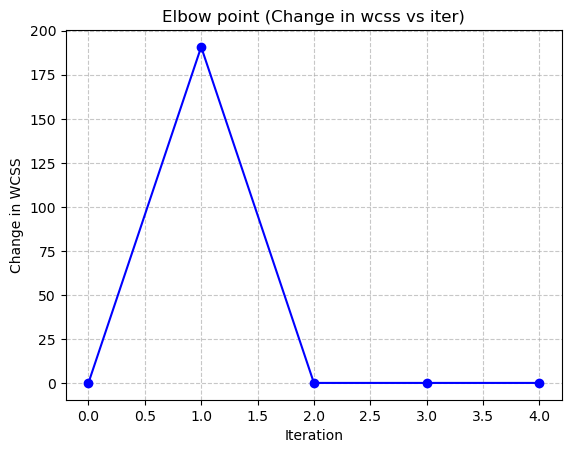

In [121]:
kmeans_loop(5, centroids)